### Home court advantage is an integral part of a basketball game. Are sportsbooks accurate when it comes to setting betting lines in favor of the home team?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')

#clean data further by removing columns
df = df[['ML', 'Home/Away']].copy()
df

,ML,Home/Away
0,105,0
1,-125,1
2,140,0
3,-160,1
4,-125,0
...,...,...
2641,-165,1
2642,145,0
2643,-165,1
2644,155,0


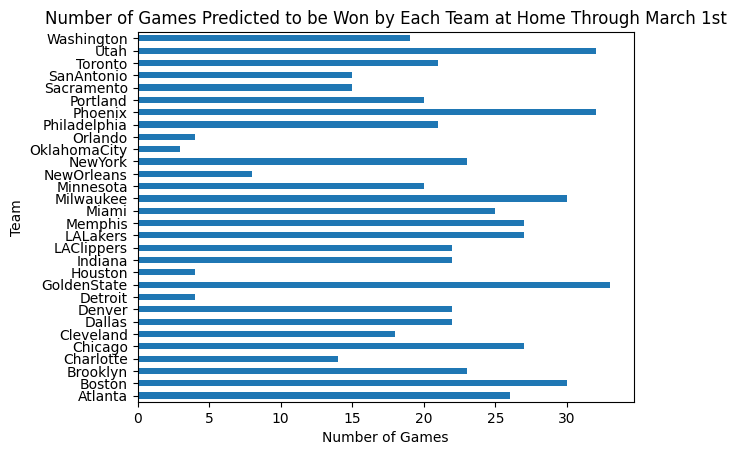

In [113]:
df.plot(kind="barh")

plt.title("Number of Games Predicted to be Won by Each Team at Home Through March 1st")
plt.xlabel("Number of Games")
plt.show()

This barchart shows what a sportsbook thinks in regards to how many games an NBA team is going to win at home up until March 1st of the 2021-2022 season. 

In [114]:
df2 = pd.read_csv('NBA_2021-2022_Actual_Outcomes_updated.csv')


#clean data further by removing columns
df2 = df2[['Home', 'Home/Away']].copy()

filter1 = df2['Home/Away'] == 1

df2.where(filter1, inplace=True)

df2 = df2.dropna()

df2 = df2.groupby('Home')['Home/Away'].count()

df2


Home
Atlanta Hawks             19
Boston Celtics            23
Brooklyn Nets             15
Charlotte Hornets         15
Chicago Bulls             27
Cleveland Cavaliers       19
Dallas Mavericks          22
Denver Nuggets            17
Detroit Pistons           11
Golden State Warriors     29
Houston Rockets            9
Indiana Pacers            16
LA Clippers               19
Los Angeles Lakers        18
Memphis Grizzlies         23
Miami Heat                24
Milwaukee Bucks           22
Minnesota Timberwolves    19
New Orleans Pelicans      14
New York Knicks           16
Oklahoma City Thunder     10
Orlando Magic              8
Philadelphia 76ers        18
Phoenix Suns              28
Portland Trail Blazers    16
Sacramento Kings          17
San Antonio Spurs         13
Toronto Raptors           18
Utah Jazz                 24
Washington Wizards        16
Name: Home/Away, dtype: int64

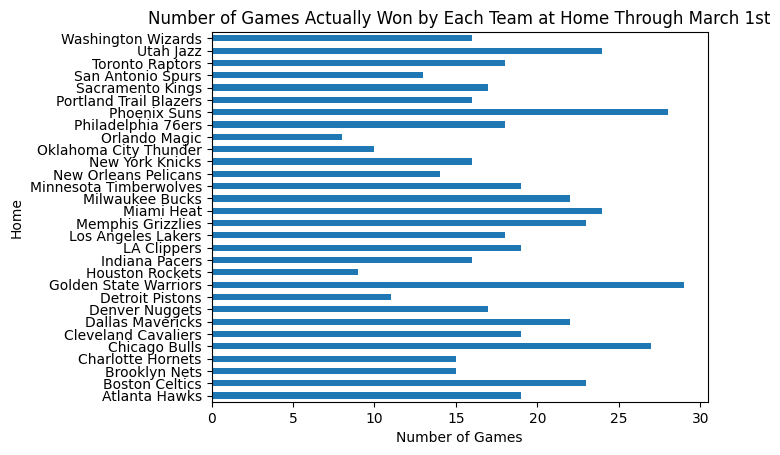

In [115]:
df2.plot(kind="barh")

plt.title("Number of Games Actually Won by Each Team at Home Through March 1st")
plt.xlabel("Number of Games")
plt.show()

This barchart shows how many games an NBA team has actually won at home up until March 1st of the 2021-2022 season.

By comparing both of these barcharts, it can be seen that for a lot of the time, the sportsbook prediction for how many games an NBA team will win at home is accurate. 

For 10 teams, the sportbook was off by more than or equal to 6 games with the most being a 9 game differential(LA Lakers). 
However, for 22 teams, the sportsbook was off by less than or equal to 5 games with the least being a 0 game differential(Chicago Bulls and Dallas Mavericks). For most teams, the sportsbook was accurate and a sportsbook user could confidently place their bet on the home team, if they are favored to win by the sportsbook. 

### ML Analyses


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("NBA_2022-2023_Scores_and_Odds.csv")

df = df[~df.Close.str.contains("pk")]
df = df[~df.Open.str.contains("pk")]
df = df[~df['2H'].str.contains("pk")]

df

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,ML,2H,Home/Away
0,1018,501,V,Philadelphia,29,34,25,29,117,229,216,135,107,0
1,1018,502,H,Boston,24,39,35,28,126,7,3,-155,2,1
2,1018,503,V,LALakers,22,30,19,38,109,229.5,223.5,260,114,0
3,1018,504,H,GoldenState,25,34,32,32,123,6.5,7.5,-310,2,1
4,1019,505,V,Washington,36,24,27,27,114,2,2.5,-135,111.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,116,512,H,Atlanta,38,32,21,30,121,222.5,1,-115,108.5,1
1322,116,513,V,Utah,27,25,35,39,126,234.5,232,155,119,0
1324,116,515,V,Phoenix,36,29,23,18,106,225.5,231,550,118,0
1325,116,516,H,Memphis,29,39,39,29,136,10,12.5,-800,6.5,1


In [12]:
df.describe()

,Date,Rot,1st,2nd,3rd,4th,Final,ML,Home/Away
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,956.638199,538.964286,28.807453,28.685559,28.697981,27.076087,114.027950,-26.358696,0.484472
std,399.838030,22.794211,5.772712,5.796715,5.828654,5.714289,11.567208,283.870083,0.499953
min,101.000000,501.000000,10.000000,11.000000,10.000000,10.000000,81.000000,-1500.000000,0.000000
25%,1024.000000,519.000000,25.000000,25.000000,25.000000,23.000000,106.000000,-200.000000,0.000000
50%,1116.000000,539.000000,29.000000,29.000000,29.000000,27.000000,113.000000,-110.000000,0.000000
75%,1209.000000,558.000000,33.000000,33.000000,33.000000,31.000000,122.000000,175.000000,1.000000
max,1231.000000,596.000000,51.000000,50.000000,51.000000,49.000000,153.000000,850.000000,1.000000


In [13]:
X = df.iloc[:, [-5, -4, -3]]
X

,Open,Close,ML
0,229,216,135
1,7,3,-155
2,229.5,223.5,260
3,6.5,7.5,-310
4,2,2.5,-135
...,...,...,...
1321,222.5,1,-115
1322,234.5,232,155
1324,225.5,231,550
1325,10,12.5,-800


In [14]:
y = df.iloc[:, -1]
y

0       0
1       1
2       0
3       1
4       0
       ..
1321    1
1322    0
1324    0
1325    1
1326    0
Name: Home/Away, Length: 1288, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=1)

In [22]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [23]:
clf.feature_importances_

array([0.35992725, 0.2946354 , 0.34543735])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6124031007751938

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       213
           1       0.56      0.61      0.59       174

    accuracy                           0.61       387
   macro avg       0.61      0.61      0.61       387
weighted avg       0.62      0.61      0.61       387



<module 'matplotlib.pyplot' from '/Users/brandonrosero/Desktop/cs418venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

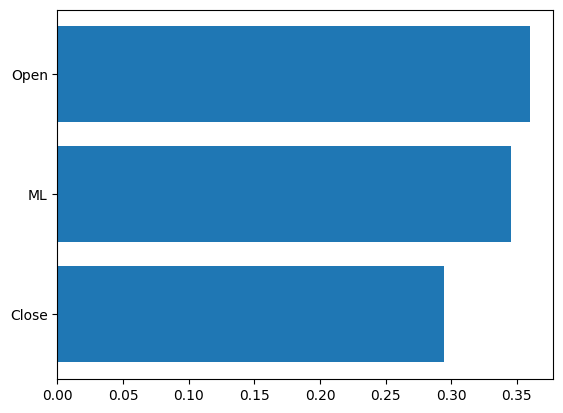

In [27]:
f = X.columns
f_importances = clf.feature_importances_
idx = np.argsort(f_importances)

plt.yticks(range(len(idx)), [f[i] for i in idx])
plt.barh(range(len(idx)), f_importances[idx])
plt

After using the Random Forest Classifier, we found that the when it comes to betting, the opening point spread serves
to be a very important bet when compared to other bets like the moneyline bet and closing point spread. It could be infered that sportsbooks view the opening point spread to be of higher importance which in turn improves the accuracy of the bet as a whole.